In [64]:
# Imports
''' %pip install pandas
%pip install pyarrow
%pip install fastparquet
%pip install prettytable '''
import prettytable
import pandas as pd
from collections import defaultdict
import seaborn as sns
from prettytable import PrettyTable
from matplotlib import pyplot as plt
import numpy as np

In [51]:
path = 'BasedeDadosPNS-2019/'
file = 'PNS2019.parquet'
read_parquet = pd.read_parquet(path+file)

In [52]:
colunas_selecionadas = ['V0001', 'C001', 'C006', 'C008', 'C009', 'V00201','V00202','V00203','V00204','V00205','V01401','V01402','V01403','V01404','V01405', 'V02701', 'V02702']

In [53]:
v = read_parquet[~read_parquet['V001'].isnull()]

In [54]:
violencia = v[colunas_selecionadas]
#violencia.to_parquet('BasedeDadosPNS-2019/PNS2019-violencia.parquet')

In [55]:
# Altera o nome das colunas
novo_nome_colunas = ['UF', 'Qtd_Moradores', 'Sexo', 'Idade','Cor_Raca', 'V_Ofensa','V_Grito','V_Rede_Social','V_Ameaca','V_Destruiu','F_Tapa','F_Empurrou','F_Soco','F_Enforca','F_Ameaca', 'S_T_Toque', 'S_T_Ameaca']
def substitur_nome_colunas(df, novo_nome_colunas):
    df.columns = novo_nome_colunas
    return df

violencia = substitur_nome_colunas(violencia, novo_nome_colunas)

In [56]:
# Altera as colunas dicotomicas, mantendo o valor 1 porem alterando o valor dois para 0
colunas_dicotomicas = ['V_Ofensa','V_Grito','V_Rede_Social','V_Ameaca','V_Destruiu','F_Tapa','F_Empurrou','F_Soco','F_Enforca','F_Ameaca', 'S_T_Toque', 'S_T_Ameaca']

def alteraDicotomico (df, colunas_dicotomicas):
    for coluna in colunas_dicotomicas:
        df.loc[df[coluna] == 2.0, coluna] = 0
    return df

violencia = alteraDicotomico(violencia, colunas_dicotomicas)

In [57]:
# Se existem dados ausentes na coluna, imprime uma tabela da seguinte forma: Primeira coluna Total de dados na coluna - Segunda coluna Total de dados ausentes na coluna - Terceira coluna Porcentagem de dados ausentes na coluna - Quarta coluna Total de dados não ausentes na coluna - Quinta coluna Porcentagem de dados não ausentes na coluna. Cada linha representa uma coluna com dados ausentes.
t = PrettyTable(['Coluna', 'Total', 'Ausentes', 'Ausentes (%)', 'Não Ausentes', 'Não Ausentes (%)'])
for col in violencia.columns:
    if any(violencia[col].isna()):
        t.add_row([col, len(violencia[col]), violencia[col].isna().sum(), round(violencia[col].isna().sum() / len(violencia[col]) * 100, 2), len(violencia[col]) - violencia[col].isna().sum(), round((len(violencia[col]) - violencia[col].isna().sum()) / len(violencia[col]) * 100, 2)])
print(t)

+--------+-------+----------+--------------+--------------+------------------+
| Coluna | Total | Ausentes | Ausentes (%) | Não Ausentes | Não Ausentes (%) |
+--------+-------+----------+--------------+--------------+------------------+
+--------+-------+----------+--------------+--------------+------------------+


In [58]:
# funcao que altera todas as colunas do tipo float para int usando a funcao .loc

def float_to_int(df):
    for col in df.columns:
        if df[col].dtype == 'float64':
            df.loc[:,col] = df[col].astype('int64')
    return df

violencia = float_to_int(violencia)

C:\Users\admin\AppData\Local\Temp\ipykernel_16020\1493254759.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,col] = df[col].astype('int64')
C:\Users\admin\AppData\Local\Temp\ipykernel_16020\1493254759.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,col] = df[col].astype('int64')


In [25]:
violencia.to_excel('BasedeDadosPNS-2019/PNS2019-violencia.xlsx')

In [59]:
# Remove as linhas em que todas as colunas dicotomicas são 0, se uma coluna dicotomica for 1, a linha não é removida
def remove_linhas(df, colunas_dicotomicas):
    df = df.loc[(df[colunas_dicotomicas] == 0).all(axis=1) == False]
    return df

violencia = remove_linhas(violencia, colunas_dicotomicas)

In [33]:
# Normalizar a coluna idade para que a menor idade fique com o valor 0 e a maior idade com o valor 1
def normalizar_idade(df):
    df['Idade'] = (df['Idade'] - df['Idade'].min()) / (df['Idade'].max() - df['Idade'].min())
    return df




In [39]:
# print which of the dicotomy columns have the most 1s
def print_most_1s(df, colunas_dicotomicas):
    for col in colunas_dicotomicas:
        print(col, df[col].sum())
        
print_most_1s(violencia, colunas_dicotomicas)

V_Ofensa 8943
V_Grito 11027
V_Rede_Social 1958
V_Ameaca 4840
V_Destruiu 1964
F_Tapa 1432
F_Empurrou 2139
F_Soco 1009
F_Enforca 328
F_Ameaca 1292
S_T_Toque 546
S_T_Ameaca 329


<AxesSubplot:xlabel='Cor_Raca', ylabel='count'>

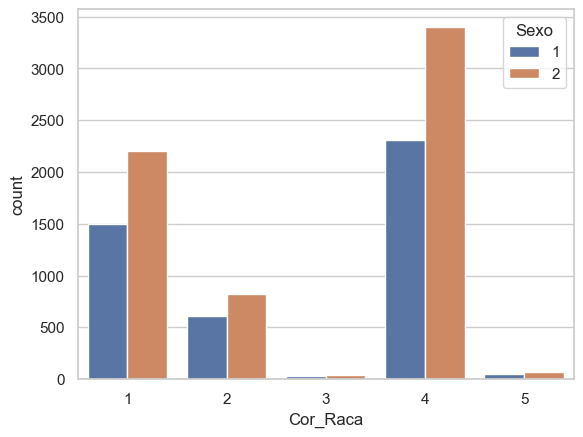

In [44]:
# plot quantity of v_grito = 1 by raca with hue sexo
sns.countplot(x='Cor_Raca', hue='Sexo', data=violencia[violencia['V_Grito'] == 1])


c:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Qtd_Moradores', ylabel='Density'>

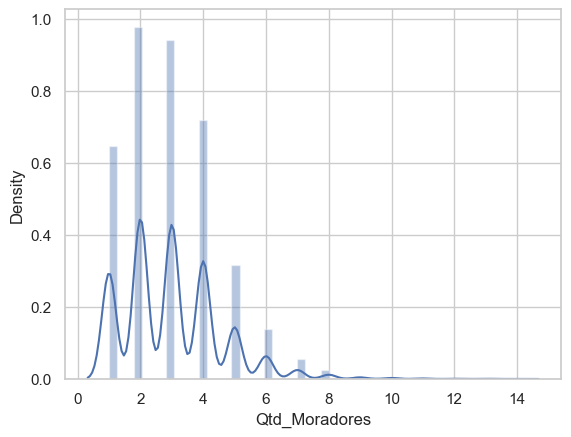

In [45]:
# plot qtd_moradores distribution
sns.distplot(violencia['Qtd_Moradores'])


In [68]:
# backup dataframe
violencia_backup = violencia.copy()

In [73]:
# Normalizing dataframe by feature clipping the lines with more than 5 moradores
def normalize_df(df):
    df = df[df['Cor_Raca'] <= 4]
    return df

violencia_backup = normalize_df(violencia_backup)

In [69]:
# Normalizing dataframe by feature clipping, removing the lines of the column idade which the total of occurrences of a value is less than 100
def normalize_df_idade(df):
    for col in df.columns:
        if df[col].dtype == 'int64':
            df = df[df[col].map(df[col].value_counts()) > 100]
    return df

violencia_backup = normalize_df_idade(violencia_backup)


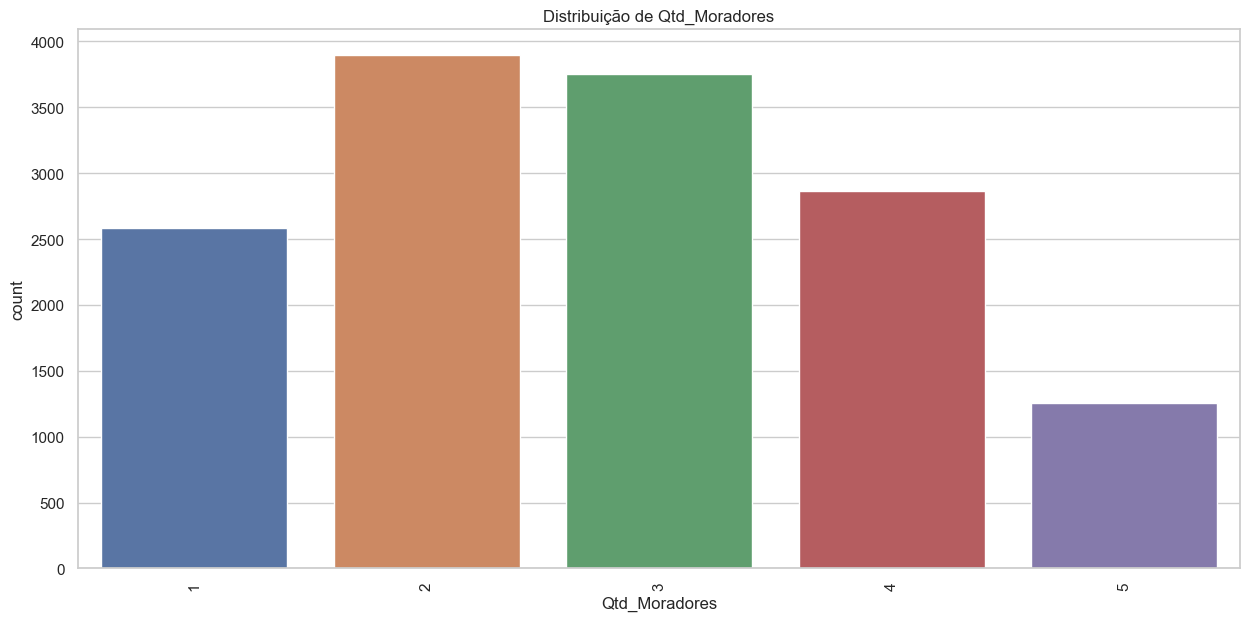

Frequente:  2


In [66]:
def dist_Attributo(df, coluna):
    plt.figure(figsize=(15,7))
    plt.title(f'Distribuição de {coluna}')
    plt.xticks(rotation=90)
    sns.countplot(data=df, x=coluna)
    plt.show()
    print('Frequente: ', df[coluna].mode()[0])
    
dist_Attributo(violencia_backup, 'Qtd_Moradores')

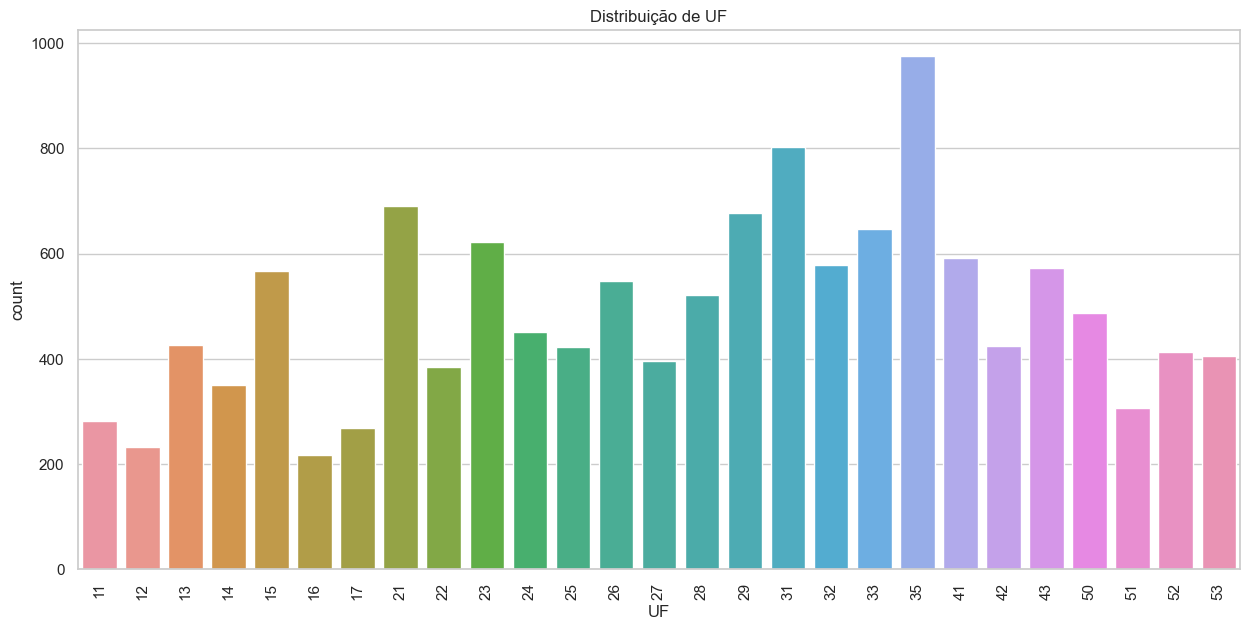

Frequente:  35


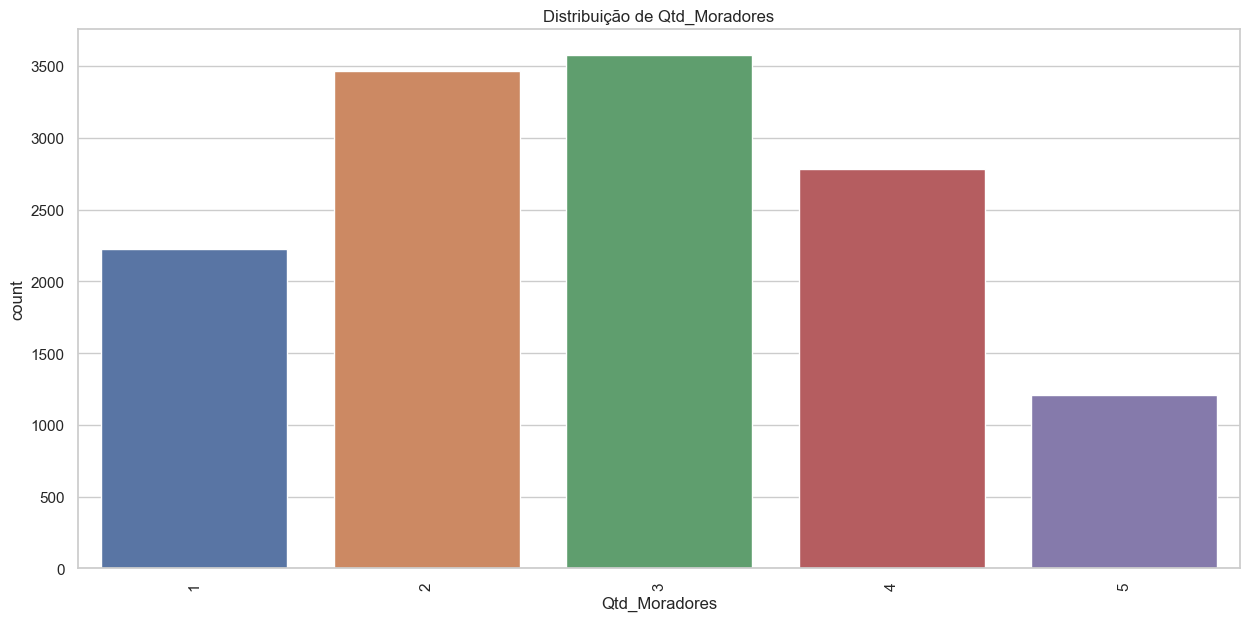

Frequente:  3


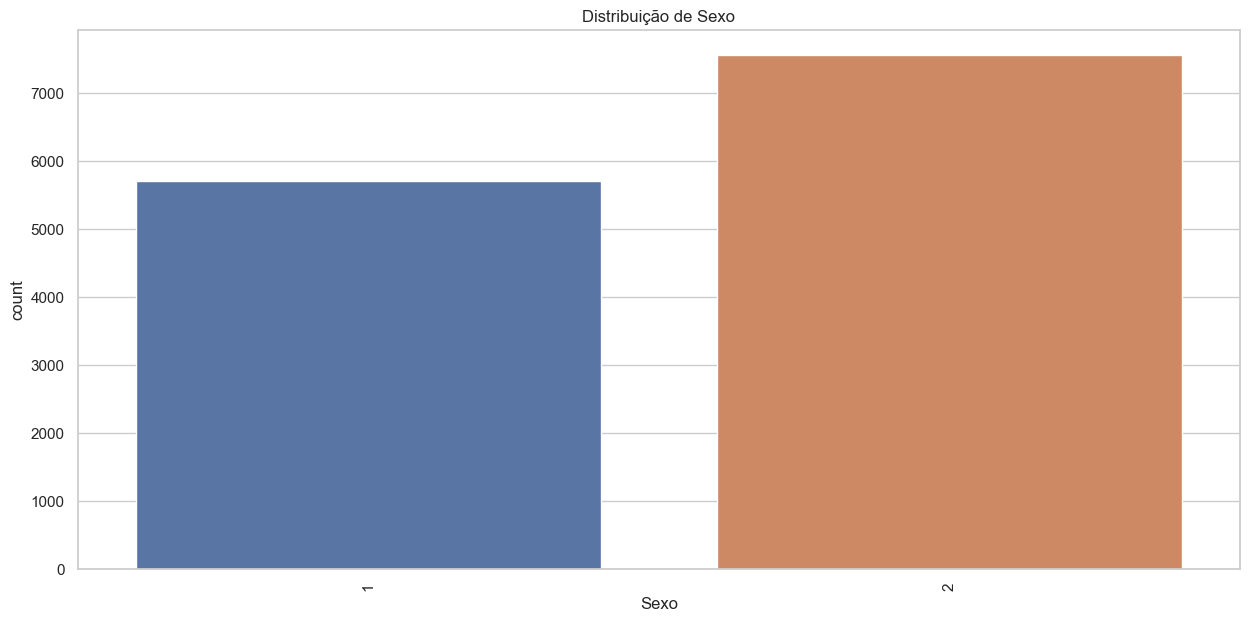

Frequente:  2


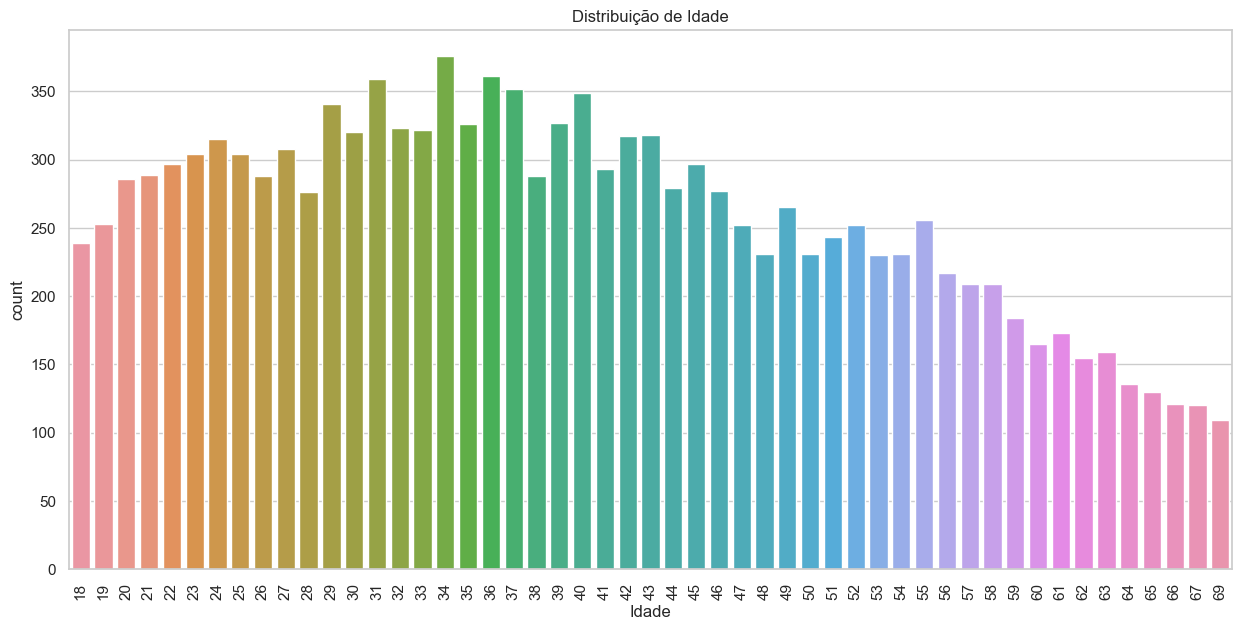

Frequente:  34


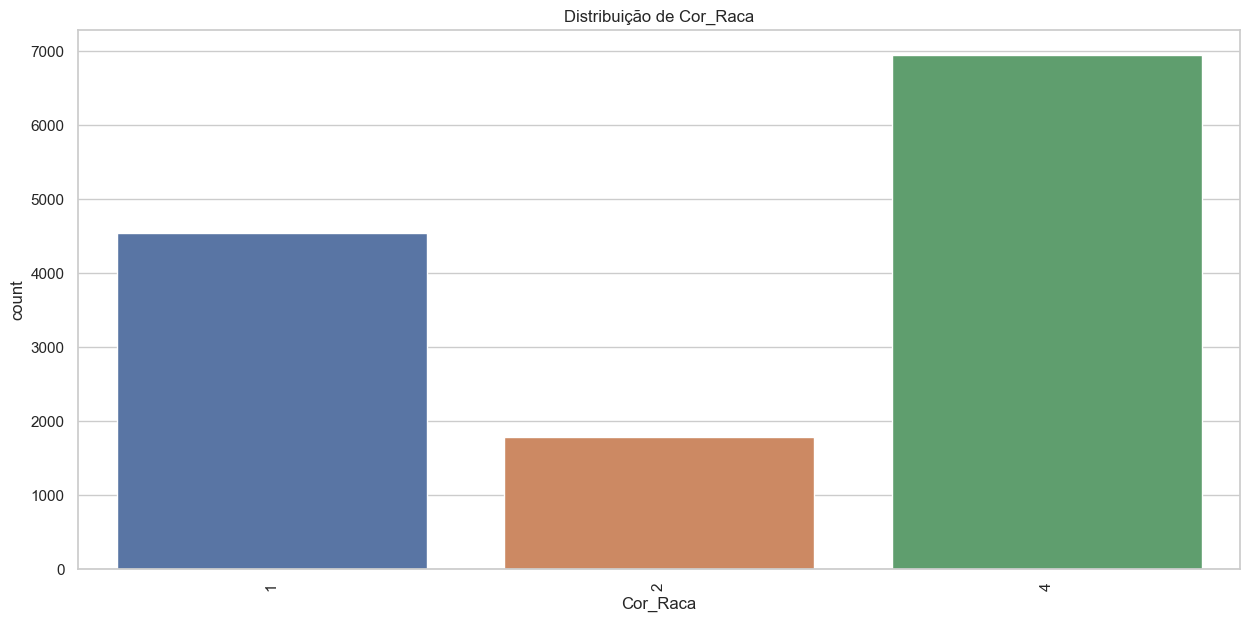

Frequente:  4


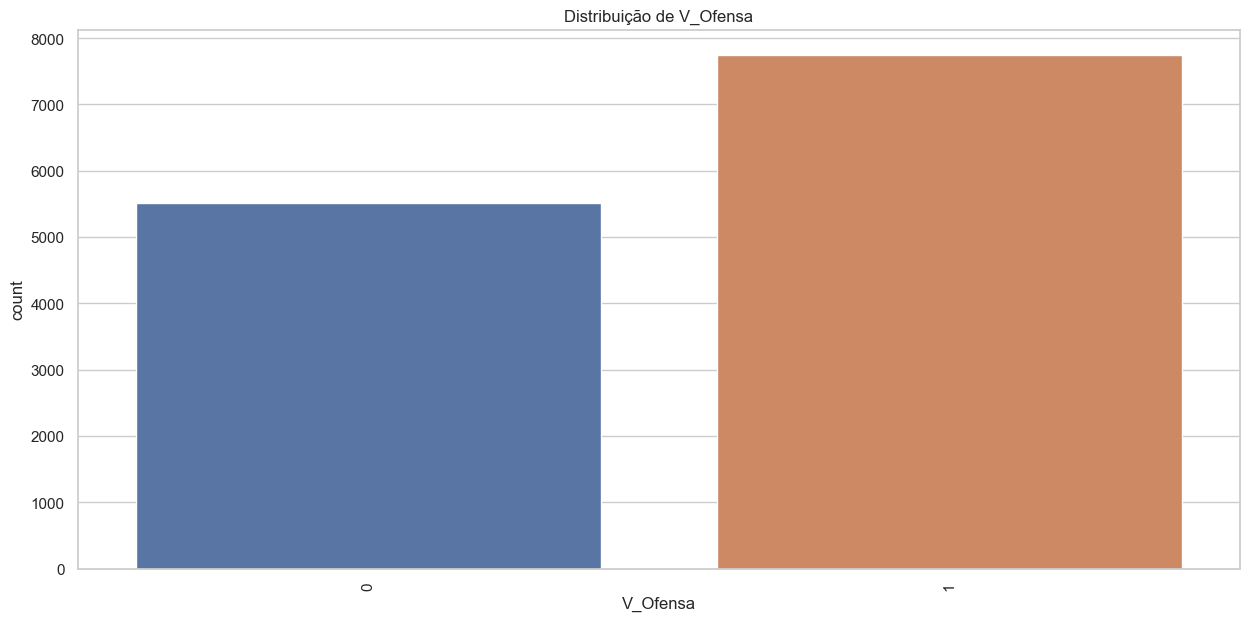

Frequente:  1


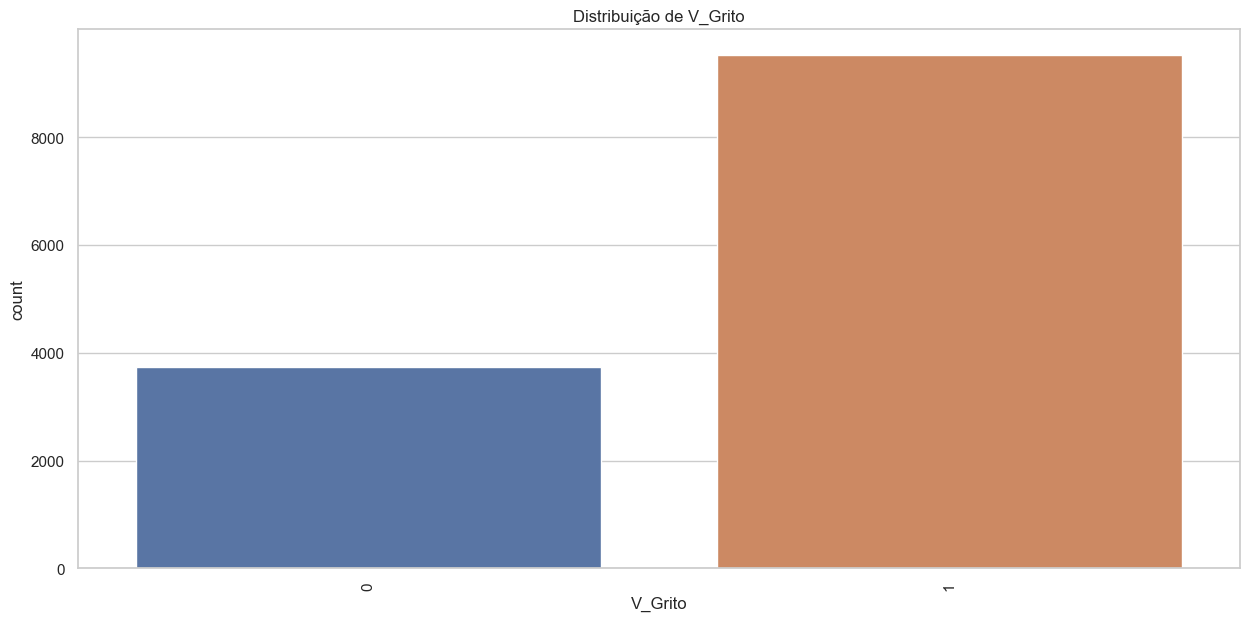

Frequente:  1


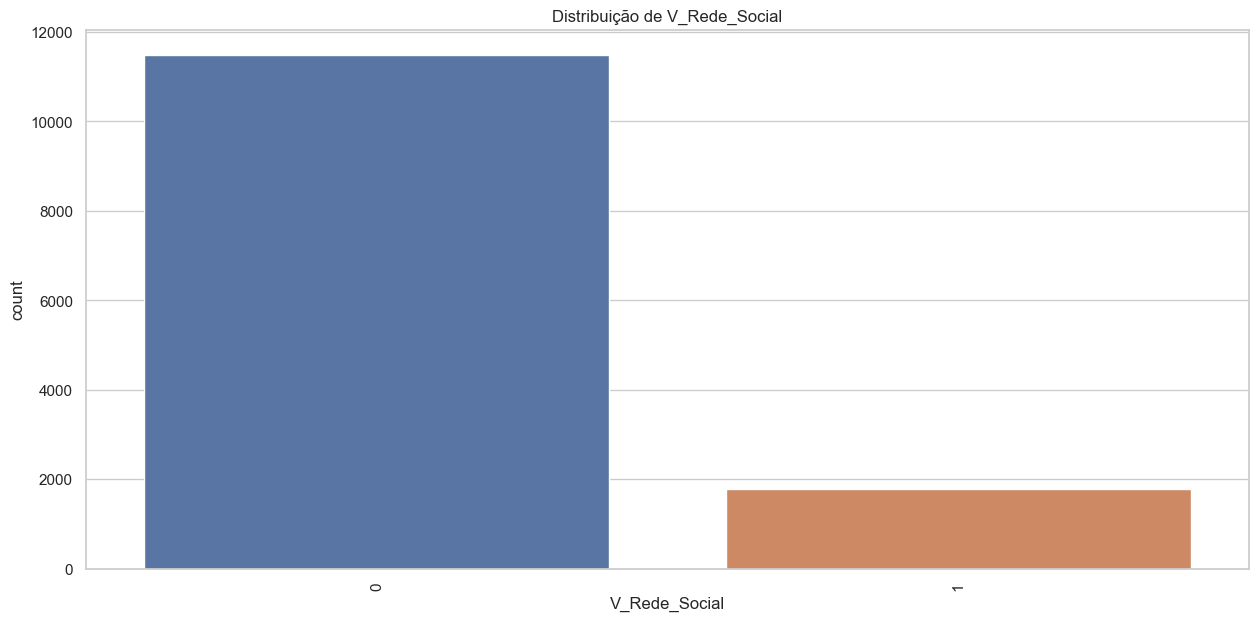

Frequente:  0


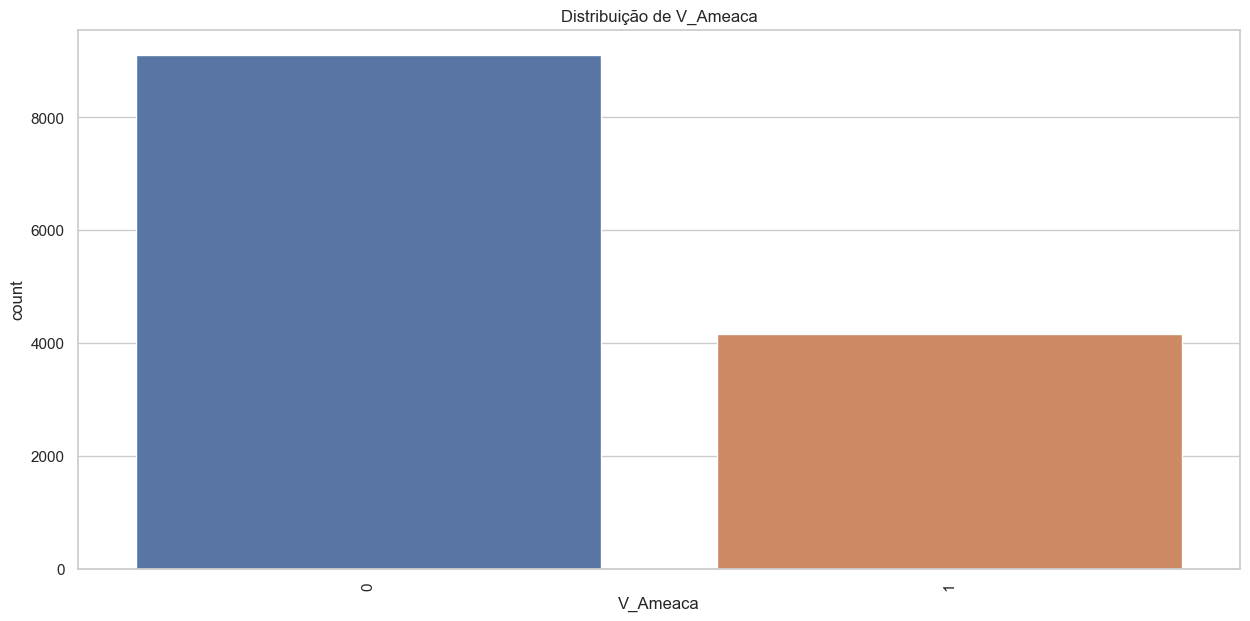

Frequente:  0


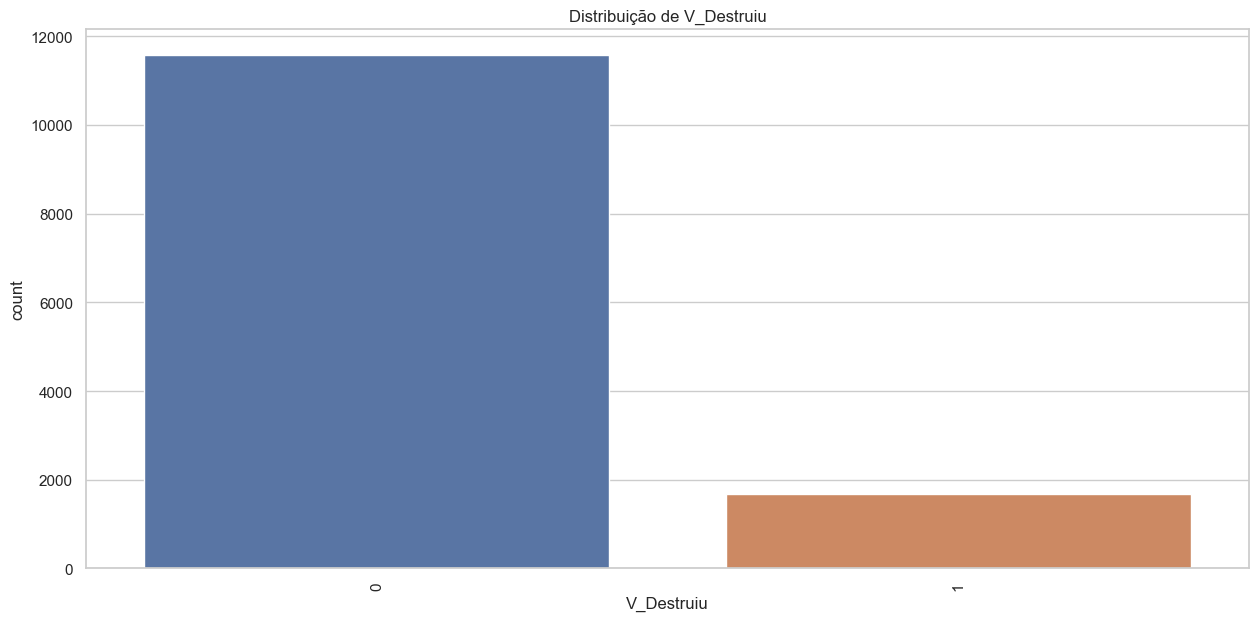

Frequente:  0


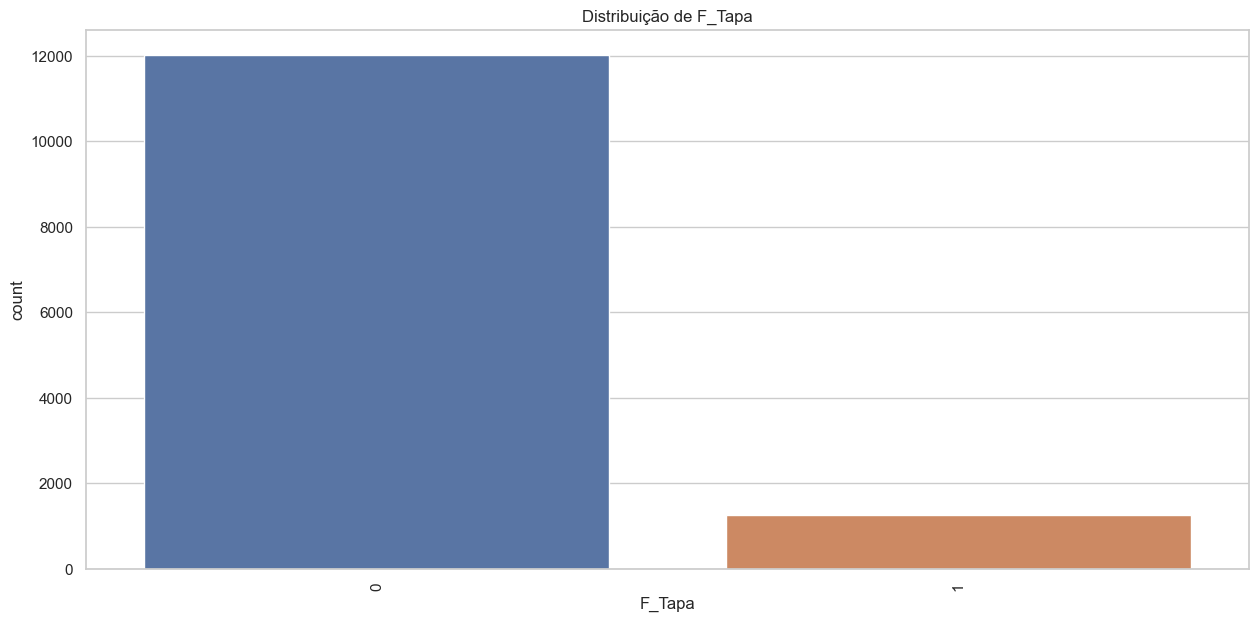

Frequente:  0


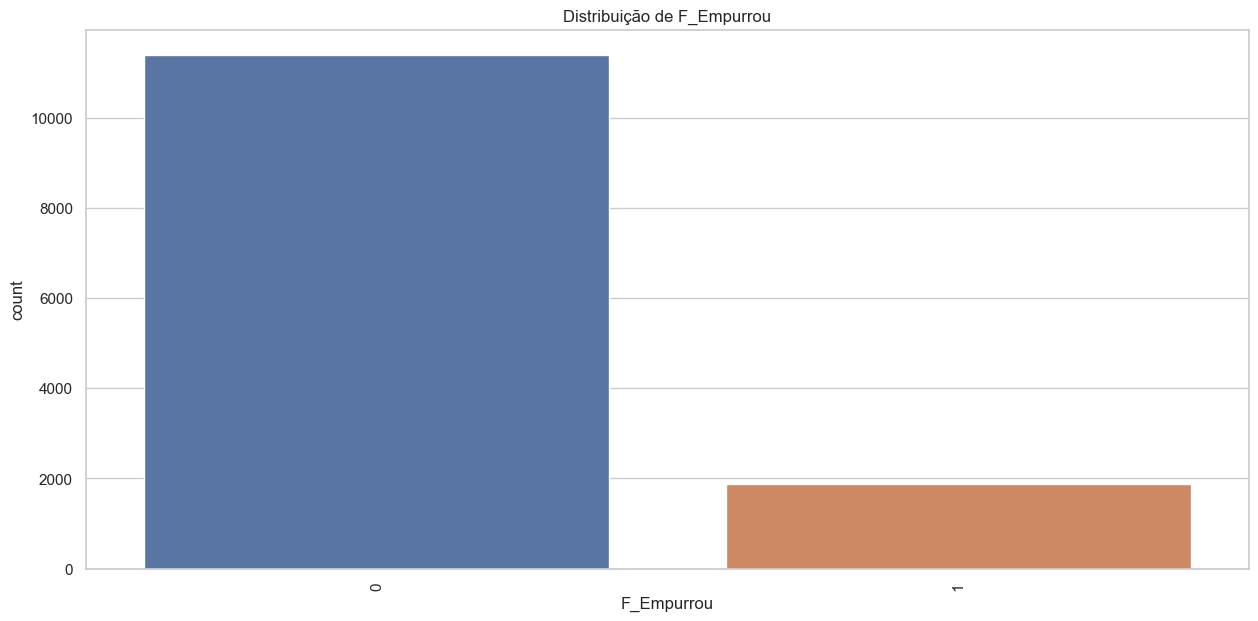

Frequente:  0


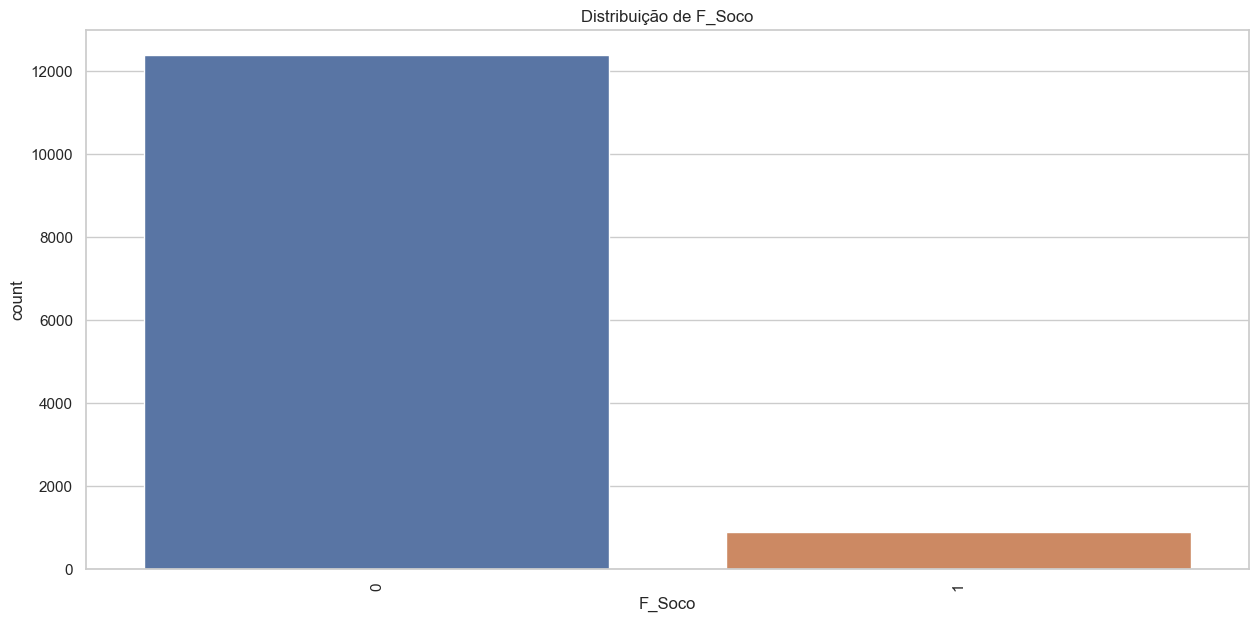

Frequente:  0


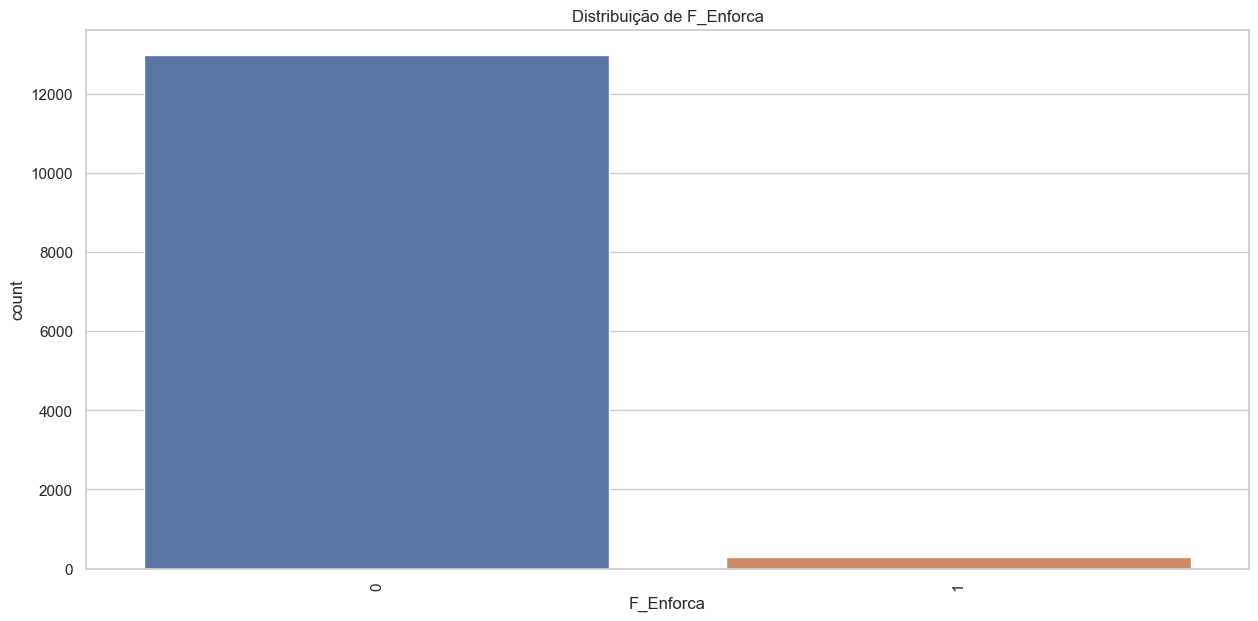

Frequente:  0


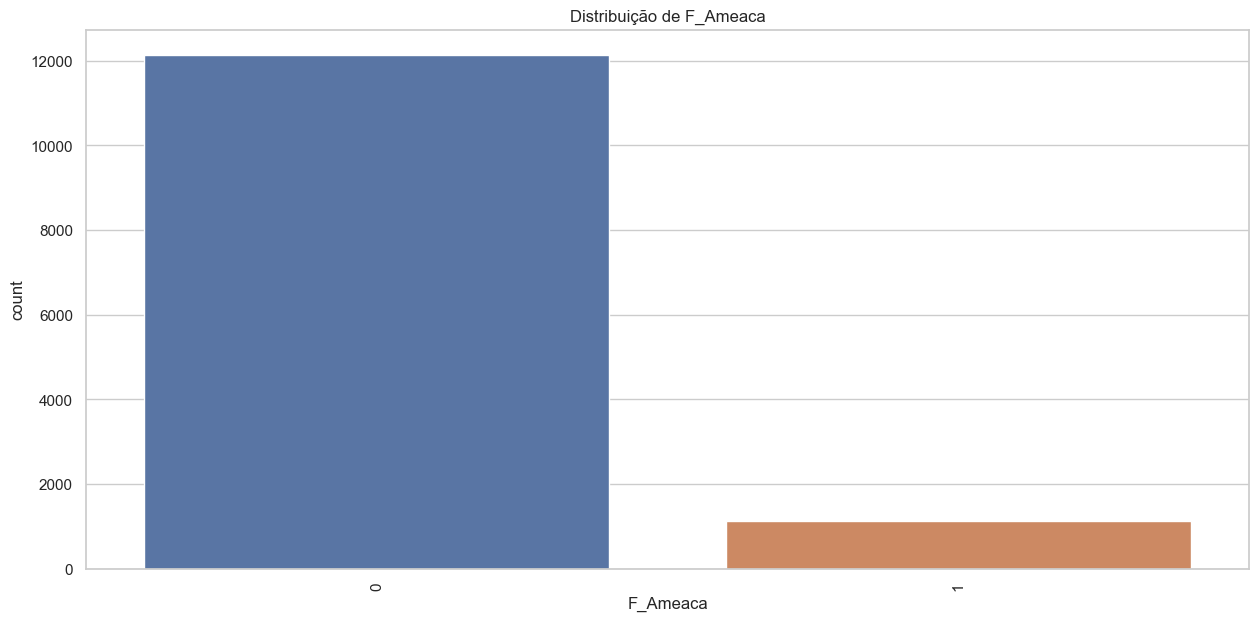

Frequente:  0


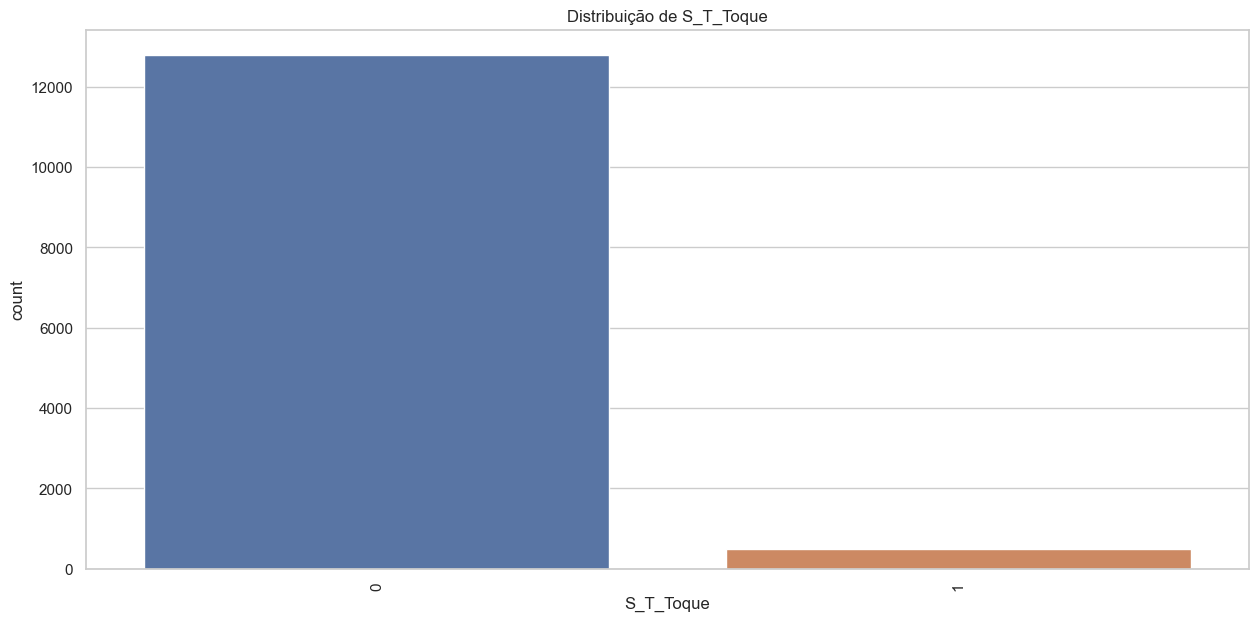

Frequente:  0


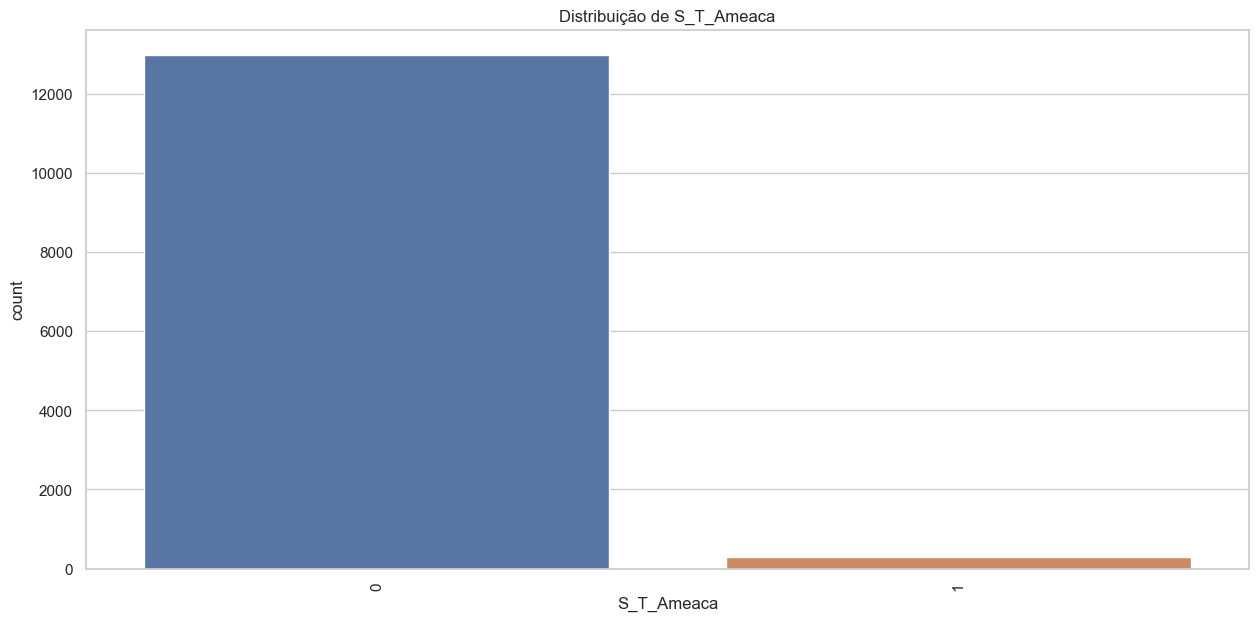

Frequente:  0


In [74]:
# plot a distribuition graph of each column

def plot_distribuition(df):
    for col in df.columns:
        plt.figure(figsize=(15,7))
        plt.title(f'Distribuição de {col}')
        plt.xticks(rotation=90)
        sns.countplot(data=df, x=col)
        plt.show()
        print('Frequente: ', df[col].mode()[0])
        
plot_distribuition(violencia_backup)

In [75]:
print_most_1s(violencia_backup, colunas_dicotomicas)

V_Ofensa 7743
V_Grito 9523
V_Rede_Social 1787
V_Ameaca 4162
V_Destruiu 1686
F_Tapa 1253
F_Empurrou 1881
F_Soco 881
F_Enforca 291
F_Ameaca 1128
S_T_Toque 481
S_T_Ameaca 289


In [ ]:
# export to csv

violencia_backup.to_csv('BasedeDadosPNS-2019/PNS2019-violencia.csv')